<a href="https://colab.research.google.com/github/Aishi0408/Python-Project/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz-2:
Objective: Implement a machine learning pipeline that involves loading a dataset, preprocessing
the data, performing feature selection (optional), tuning hyperparameters, applying k-fold cross-
validation, training a model, and evaluating its performance using either a Naive Bayes or K-
Nearest Neighbors (KNN) classifier.

#Data Loading and EDA(Explatory Data Analysis)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assuming df is your dataframe with features and target
df = pd.read_csv('/content/drive/MyDrive/quiz/diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


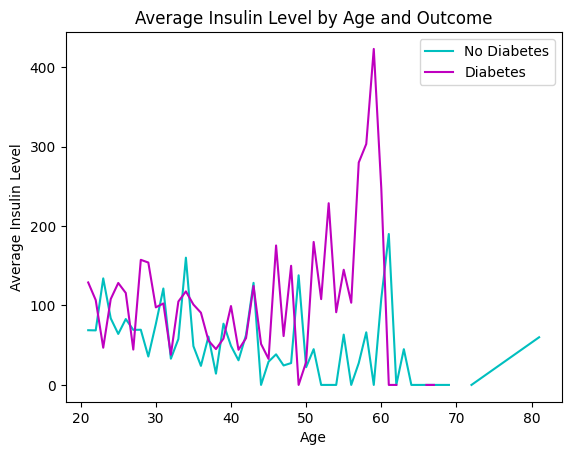

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(['Age', 'Outcome'])['Insulin'].mean().unstack()
plt.plot(df_grouped.index, df_grouped[0], label='No Diabetes',color='c')
plt.plot(df_grouped.index, df_grouped[1], label='Diabetes',color='m')
plt.xlabel('Age')
plt.ylabel('Average Insulin Level')
plt.title('Average Insulin Level by Age and Outcome')
_ = plt.legend()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Data Encoding
data_obj = df.select_dtypes(['object']).columns

In [ ]:
data_obj

Index([], dtype='object')

#Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check if 'num_outbound_cmds' is in the DataFrame
if 'num_outbound_cmds' in df.columns:
    df = df.drop('num_outbound_cmds', axis=1)  # Drop the column if it exists
else:
    print("Column 'num_outbound_cmds' not found in DataFrame.")

data = df.iloc[:, :-1]
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data[:2]

Column 'num_outbound_cmds' not found in DataFrame.


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191]])

In [ ]:
X = scaled_data.copy()  # Create a copy of the NumPy array
# Exclude 'Outcome' and 'num_outbound_cmds' from the columns
X = pd.DataFrame(X, columns=[col for col in df.columns if col not in ['Outcome', 'num_outbound_cmds']])
X.drop('Outcome', axis=1, inplace=True, errors='ignore')  # Now you can drop the column, ignoring errors if it doesn't exist
y = df['Outcome'].copy(deep=True)

In [ ]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Selection

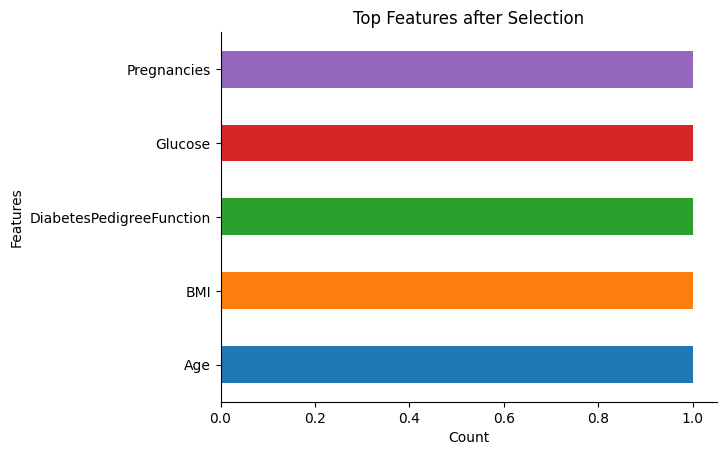

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import itertools
import seaborn as sns

# Convert X to a Pandas DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)  # Assuming X is a NumPy array

selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, y_train)
feature_map = [(i, v) for i, v in zip(selector.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i]
top_features = pd.DataFrame({'Top Features': selected_features})
top_features.groupby('Top Features').size().plot(kind='barh', color=sns.palettes.mpl_palette("tab10"))
plt.gca().spines[['top', 'right',]].set_visible(False)  # Remove top and right spines
plt.title('Top Features after Selection')
plt.xlabel('Count')
plt.ylabel('Features')
plt.show()

In [ ]:
top_features.index=top_features.index+1
top_features

,Top Features
1,Pregnancies
2,Glucose
3,BMI
4,DiabetesPedigreeFunction
5,Age


#Hyperparameter Tuning


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
X2 = X_train[selected_features]
y2 = y_train

In [ ]:
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
param_grid_MNB = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

In [ ]:
knn = KNeighborsClassifier()
mnb = MultinomialNB()
grid_search_KNN = GridSearchCV(knn, param_grid_KNN, cv=5)
grid_search_MNB = GridSearchCV(mnb, param_grid_MNB, cv=5, n_jobs=1)

In [ ]:
grid_search_KNN.fit(X2, y2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [ ]:
X2_shifted = X2 - np.min(X2) #Shift values to be non-negative
grid_search_MNB.fit(X2_shifted, y2)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]})

In [ ]:
print("Best parameters for KNN:", grid_search_KNN.best_params_)
print("Best parameters for MNB:", grid_search_MNB.best_params_)
print("Best score for KNN:", grid_search_KNN.best_score_)
print("Best score for MNB:", grid_search_MNB.best_score_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11}
Best parameters for MNB: {'alpha': 0.1}
Best score for KNN: 0.7572837531654004
Best score for MNB: 0.6530987604958016


#K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn, X2, y2, cv=skf)
print("k-NN Cross-validation scores:", knn_scores)
print("k-NN Average score:", knn_scores.mean())

k-NN Cross-validation scores: [0.76422764 0.76422764 0.74796748 0.74796748 0.73770492]
k-NN Average score: 0.7524190323870452


In [ ]:
mnb_scores = cross_val_score(mnb, X2_shifted, y2, cv=skf)
print("MultinomialNB Cross-validation scores:", mnb_scores)
print("MultinomialNB Average score:", mnb_scores.mean())

MultinomialNB Cross-validation scores: [0.65853659 0.6504065  0.6504065  0.6504065  0.6557377 ]
MultinomialNB Average score: 0.6530987604958016


#Training and Testing


Accuracy:  0.7532467532467533
Precision:  0.6888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



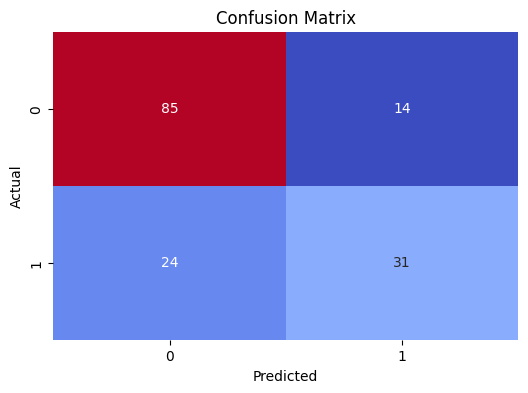

In [ ]:
# using hyperparameter tuning we find that the best selected classifier is KNN.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from IPython.display import display, HTML
knn2=KNeighborsClassifier(n_neighbors=11,metric='manhattan')
knn2.fit(X2, y2)
y_pred = knn2.predict(X_test[selected_features])
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
code = """
<pre><code><b>K-Neighbors Classifier</b></code></pre>
"""
display(HTML(code))
print()
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Classification Report:\n", report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

#Model Evaluation

In [ ]:
print("k-NN Cross-validation scores:", knn_scores)
print("k-NN Average score:", knn_scores.mean())

k-NN Cross-validation scores: [0.76422764 0.76422764 0.74796748 0.74796748 0.73770492]
k-NN Average score: 0.7524190323870452


In [ ]:
mnb_scores = cross_val_score(mnb, X2_shifted, y2, cv=skf)
print("MultinomialNB Cross-validation scores:", mnb_scores)
print("MultinomialNB Average score:", mnb_scores.mean())

MultinomialNB Cross-validation scores: [0.65853659 0.6504065  0.6504065  0.6504065  0.6557377 ]
MultinomialNB Average score: 0.6530987604958016


In [ ]:
print("Accuracy for KNN: ", accuracy_score(y_test,y_pred))

Accuracy for KNN:  0.7532467532467533
